In [1]:
# Comparative analysis of spectra from peptide spectrograms


In [2]:
# Open source spectrometry

!pip install pyopenms

In [3]:
import numpy as np
import pandas as pd
import pyopenms as ms
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]


In [4]:
# Load datafiles

dataOld = pd.read_csv('/datasets/oldfilter-csv/oldfilter.csv')
dataOldUnfiltered = pd.read_csv('/datasets/old-csv/old.csv')

dataNew = pd.read_csv('/datasets/newfilter-csv/newfilter.csv')
dataNewUnfiltered = pd.read_csv('/datasets/new-csv/new.csv')

In [5]:
# Spectrum plot

def plot_spectrum(spectrum, threshold):
     # plot every peak in spectrum and annotate with it's m/z
     for mz, i in zip(*spectrum.get_peaks()):
        if (i > threshold):
          plt.plot([mz, mz], [0, i], color = 'black')
          plt.text(mz, i, str(mz))

     # for the title add RT and Precursor m/z if available
     title = ''
     if spectrum.getRT() >= 0:
         title += 'RT: ' + str(spectrum.getRT())
     if len(spectrum.getPrecursors()) >= 1:
         title += '   Precursor m/z: ' + str(spectrum.getPrecursors()[0].getMZ())

     plt.title(title)
     plt.ylabel('intensity')
     plt.xlabel('m/z')
     plt.ylim(bottom=0)

     plt.show()

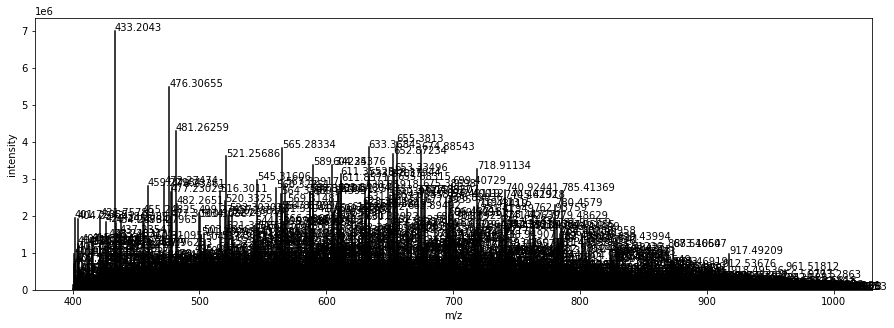

In [6]:
# Raw plot of old spectrum

spectrumOld = ms.MSSpectrum()
spectrumOld.set_peaks([dataOld['m/z'],dataOld['Response']])
spectrumOld.sortByPosition()
plot_spectrum(spectrumOld, 0)

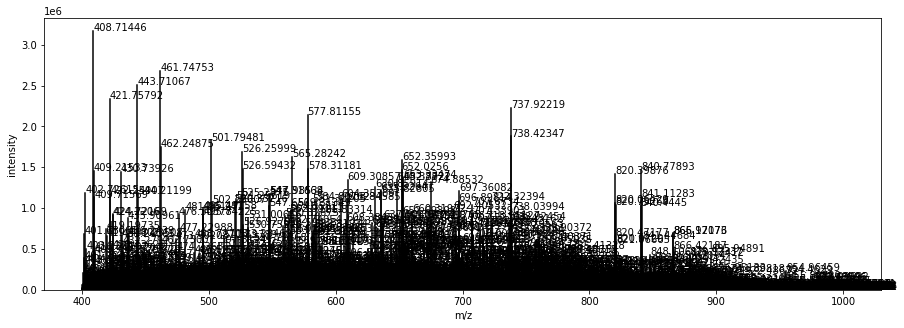

In [7]:
# Raw plot of New Spectrum

spectrumNew = ms.MSSpectrum()
spectrumNew.set_peaks([dataNew['m/z'],dataNew['Response']])
spectrumNew.sortByPosition()
plot_spectrum(spectrumNew, 0)

In [8]:
    # Function to plot spectrum comparison

    def comp_plot(obs_mz, obs_int, theo_mz, theo_int, title):
        plt.figure(figsize=(16,8))
        plt.bar(obs_mz, obs_int, width = 3.0)
        plt.bar(theo_mz, theo_int, width = 3.0)
        plt.title(title)
        plt.ylabel('intensity')
        plt.xlabel('m/z')

In [9]:
#Normalize datasets

title = 'Comparative Analysis'
old_mz, old_int = spectrumOld.get_peaks()
new_mz, new_int = spectrumNew.get_peaks()

old_int = [element / max(old_int) for element in old_int]
new_int = [element / max(new_int) for element in new_int]
inv_new_int = [-1*element / max(new_int) for element in new_int]

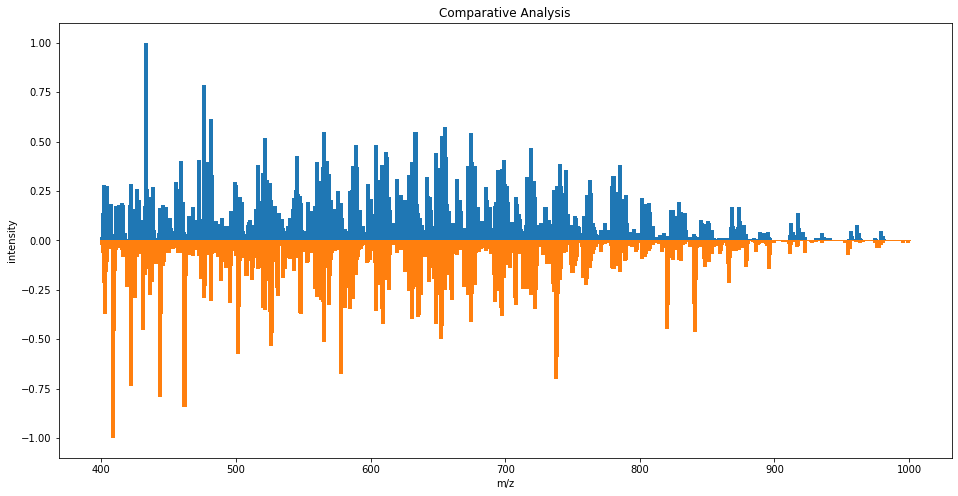

In [10]:
#Spectrum Comparison

comp_plot(old_mz, old_int, new_mz, inv_new_int, title)

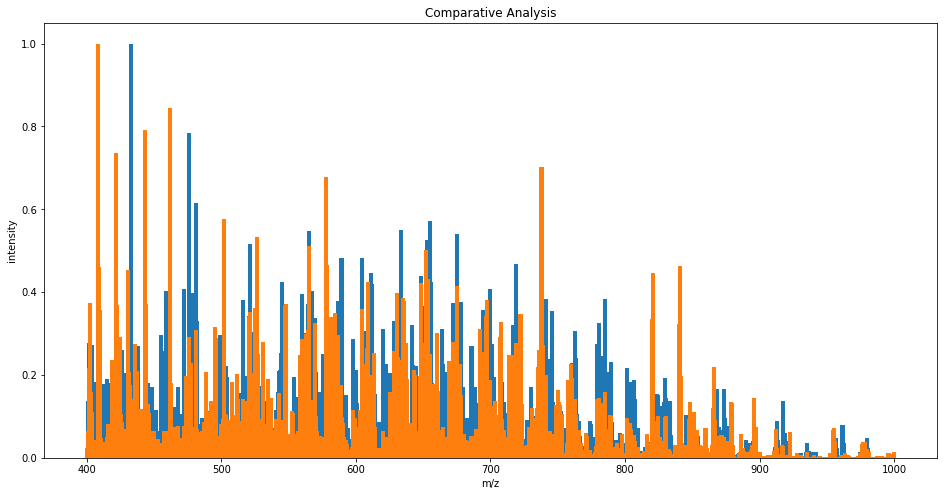

In [11]:
# Spectrum Overlay

comp_plot(old_mz, old_int, new_mz, new_int, title)

In [12]:
# Filter based on RT with max difference between datasets

dataRT = [8.022, 6.226, 7.947, 6.855, 8.097, 12.437, 7.783, 7.858, 7.678, 12.377, 7.438, 6.391, 8.172, 7.289, 5.807]
dataRT.sort()

1st Spectrum RT =  6.96


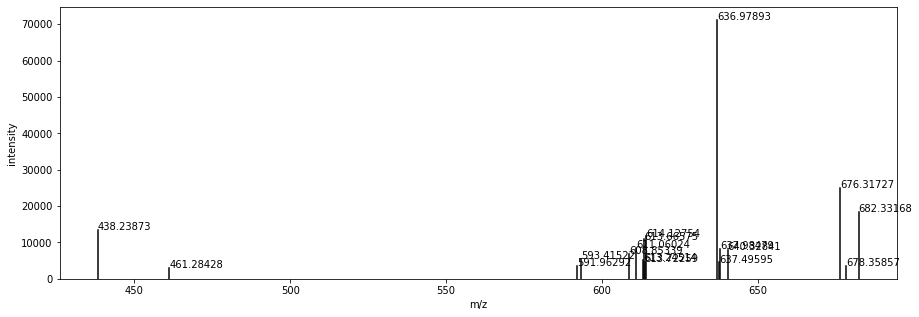

2nd Spectrum RT =  6.96


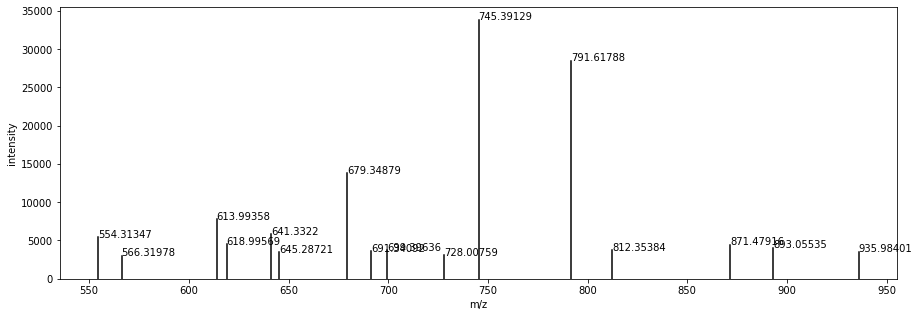

Comparative RT =  6.96


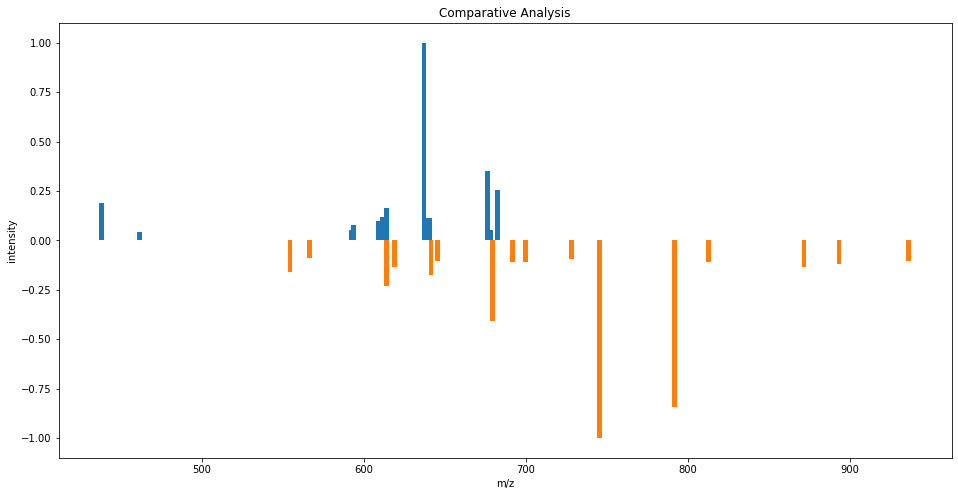

In [19]:
# Generate plots

for r in dataRT:
    dataOldTmp = dataOld[dataOld["RT"].round(2)==r]
    dataNewTmp = dataNew[dataNew["RT"].round(2)==r]

    dataOldTmp = dataOldTmp.reset_index(drop=True)
    dataNewTmp = dataNewTmp.reset_index(drop=True)
    
    spectrumOld.set_peaks([dataOldTmp['m/z'],dataOldTmp['Response']])
    spectrumOld.sortByPosition()

    spectrumNew.set_peaks([dataNewTmp['m/z'],dataNewTmp['Response']])
    spectrumNew.sortByPosition()
    
    print("1st Spectrum RT = ", r)
    plot_spectrum(spectrumOld, 0)
    print("2nd Spectrum RT = ", r)
    plot_spectrum(spectrumNew, 0)
    
    title = 'Comparative Analysis'
    old_mz, old_int = dataOldTmp['m/z'],dataOldTmp['Response']
    new_mz, new_int = dataNewTmp['m/z'],dataNewTmp['Response']

    old_int = [element / max(old_int) for element in old_int]
    new_int = [element / max(new_int) for element in new_int]
    inv_new_int = [-1*element / max(new_int) for element in new_int]
  
    print("Comparative RT = ", r)
    comp_plot(old_mz, old_int, new_mz, inv_new_int, title)
    plt.show()
    